In [2]:
import pandas as pd
from os import path
import os
from datetime import datetime
import matplotlib.pyplot as plt
import glob

In [3]:
# extraction of all the csv files in the folder into dataframes
ext_path = './timeseries/external.csv'
external_df = pd.read_csv(ext_path, sep=',', header=0, index_col=1, parse_dates=True)
external_df.drop(['Unnamed: 0'], axis=1, inplace=True)

glob_path = './timeseries/global.csv'
transactions_df = pd.read_csv(glob_path, sep=',', header=0, index_col=0, parse_dates=True)
# drop the original "year", "month", and "day" columns
transactions_df.drop(columns=['year', 'month', 'day'], inplace=True)

actor_df = pd.read_csv('timeseries/blockchain_by_actor.csv', index_col=0)
# Remove lines where year = 0
actor_df = actor_df[actor_df['year'] != 0]
# combine "year", "month", and "day" columns into a single datetime column
actor_df['date'] = pd.to_datetime(actor_df[['year', 'month', 'day']])
# drop the original "year", "month", and "day" columns
actor_df.drop(columns=['year', 'month', 'day'], inplace=True)
# Change the nb_received and nb_transactions and nb_spent and sum_fee columns to integers
actor_df = actor_df.astype({'nb_received': 'int64', 'nb_transactions': 'int64', 'nb_spent': 'int64', 'sum_fee': 'int64'})
# set the index to the identity of the actor
#actor_profits_df.set_index('identity', inplace=True)
#actor_profits_df = actor_profits_df.groupby([actor_profits_df.index, 'date']).sum()

fileNames = glob.glob('networks/*')
print(fileNames)
file_dict = {
    datetime.strptime(path.basename(file).split('.')[0], '%Y-%m-%d'): pd.read_csv(file)
    for file in fileNames
}

network_df = pd.concat(file_dict).sort_index()


['networks\\2015-1-1.csv', 'networks\\2015-1-10.csv', 'networks\\2015-1-11.csv', 'networks\\2015-1-12.csv', 'networks\\2015-1-13.csv', 'networks\\2015-1-14.csv', 'networks\\2015-1-15.csv', 'networks\\2015-1-16.csv', 'networks\\2015-1-17.csv', 'networks\\2015-1-18.csv', 'networks\\2015-1-19.csv', 'networks\\2015-1-2.csv', 'networks\\2015-1-20.csv', 'networks\\2015-1-21.csv', 'networks\\2015-1-22.csv', 'networks\\2015-1-23.csv', 'networks\\2015-1-24.csv', 'networks\\2015-1-25.csv', 'networks\\2015-1-26.csv', 'networks\\2015-1-27.csv', 'networks\\2015-1-28.csv', 'networks\\2015-1-29.csv', 'networks\\2015-1-3.csv', 'networks\\2015-1-30.csv', 'networks\\2015-1-31.csv', 'networks\\2015-1-4.csv', 'networks\\2015-1-5.csv', 'networks\\2015-1-6.csv', 'networks\\2015-1-7.csv', 'networks\\2015-1-8.csv', 'networks\\2015-1-9.csv', 'networks\\2015-10-1.csv', 'networks\\2015-10-10.csv', 'networks\\2015-10-11.csv', 'networks\\2015-10-12.csv', 'networks\\2015-10-13.csv', 'networks\\2015-10-14.csv', 'net

In [4]:
external_df.head()

,PriceUSD,HashRate
date,,
2015-01-02,315.942732,333345.017260
2015-01-03,285.647310,327284.198765
2015-01-04,263.334575,347486.927083
2015-01-05,275.003852,315162.561773
2015-01-06,287.549521,319203.107437


In [5]:
transactions_df.head()

,total_fee,total_received_satoshi,total_sent_satoshi,mean_fee_satoshi,mean_feeUSD,mean_fee_for100,nb_transactions,nb_payments,mean_nb_inputs,mean_nb_outputs,nb_mining,total_mining_satoshi,newly_created_coins,self_spent_satoshi,total_received,volume_without_self
2015-01-01,801373971,45473028339385,45058028339385,13609.829337,4.284054e+06,0.799999,58882,161194,2.595241,2.737577,166,415801373971,415000000000,2757774885900,45473028339385,42715253453485
2015-01-02,1159934218,73370568521080,72955568521080,14978.682808,4.732406e+06,0.778933,77439,257633,2.715557,3.326915,166,416159934218,415000000000,4316724676318,73370568521080,69053843844762
2015-01-03,1196476043,82635189454578,82220189454578,14304.385766,4.086009e+06,0.797419,83644,295618,2.781885,3.534240,166,416196476043,415000000000,5584584356557,82635189454578,77050605098021
2015-01-04,2159195328,115159442449532,114726942449532,25138.199015,6.619757e+06,0.899054,85893,280288,2.770133,3.263223,173,434659195328,432500000000,6554587956125,115159442449532,108604854493407
2015-01-05,1608443040,112439228285641,112051728285641,16955.609622,4.662858e+06,0.898594,94862,286552,2.954471,3.020725,155,389108443040,387500000000,5063695492444,112439228285641,107375532793197


In [6]:
actor_df.head()

,identity,received,nb_received,date,sum_fee,mean_fee_for100,nb_transactions,sent,self_spent,self_spent_estimated,nb_spent,spent
0,HappyCoins.com,1.377590e+09,4,2015-01-01,49596,0.004957,4,1.277500e+09,0.0,0.0,8,1.277500e+09
1,821,2.476057e+09,5,2015-01-01,10000,0.000851,1,1.174552e+09,0.0,0.0,2,1.174552e+09
2,FortuneJack.com,1.201470e+08,29,2015-01-01,83000,0.194670,11,1.541127e+08,14158970.0,14158970.0,22,1.399538e+08
3,396,1.906135e+10,70,2015-01-01,540000,0.023738,54,1.842989e+10,0.0,0.0,108,1.842989e+10
4,SatoshiMines.com,7.401319e+08,193,2015-01-01,740000,0.447934,45,1.813624e+09,35044568.0,35044568.0,84,1.778579e+09


In [7]:
network_df.head()

Source        Target        value  \
2015-01-01 0  ePay.info_CoinJoinMess  CloudBet.com      3519173   
           1                  Cex.io          1956      8491196   
           2                  157228     C-Cex.com  10833480021   
           3                       0           421     27123449   
           4            BTCGuild.com        787953   2507884460   

              nb_transactions  
2015-01-01 0                1  
           1                3  
           2                1  
           3                8  
           4                1

In [8]:
actor_df.set_index('identity', inplace=True)
actor_df = actor_df.groupby([actor_df.index, 'date']).sum()

# add a new column to the actor_df dataframe that contains the balance of the actor calculated as : received - (spent - self_spent) - sum_fee
actor_df['balance'] = actor_df['received'] - (actor_df['spent'] - actor_df['self_spent']) - actor_df['sum_fee']
actor_df.head()

received  nb_received   sum_fee  mean_fee_for100  \
identity date                                                               
0        2015-01-01  3.021860e+10         4265  12350755         1.926137   
         2015-01-02  3.401216e+10         8395  15588104         1.882565   
         2015-01-03  2.546280e+11        10004  14742886         1.984796   
         2015-01-04  2.431648e+11         9007  18683447         2.075441   
         2015-01-05  4.882942e+10         6553  15866463         1.883876   

                     nb_transactions          sent  self_spent  \
identity date                                                    
0        2015-01-01              783  3.001272e+10         0.0   
         2015-01-02              962  3.400937e+10         0.0   
         2015-01-03              943  2.517348e+11         0.0   
         2015-01-04             1059  2.429788e+11         0.0   
         2015-01-05              995  4.926332e+10         0.0   

                     self_spent_estimated  nb_spent         spent  \
identity date                                                       
0        2015-01-01          0.000000e+00      1696  3.001272e+10   
         2015-01-02          0.000000e+00      2068  3.400937e+10   
         2015-01-03          2.011365e+11      2039  5.059830e+10   
         2015-01-04          2.004149e+11      2293  4.256388e+10   
         2015-01-05          0.000000e+00      2098  4.926332e+10   

                          balance  
identity date                      
0        2015-01-01  1.935257e+08  
         2015-01-02 -1.280615e+07  
         2015-01-03  2.040150e+11  
         2015-01-04  2.005823e+11  
         2015-01-05 -4.497694e+08

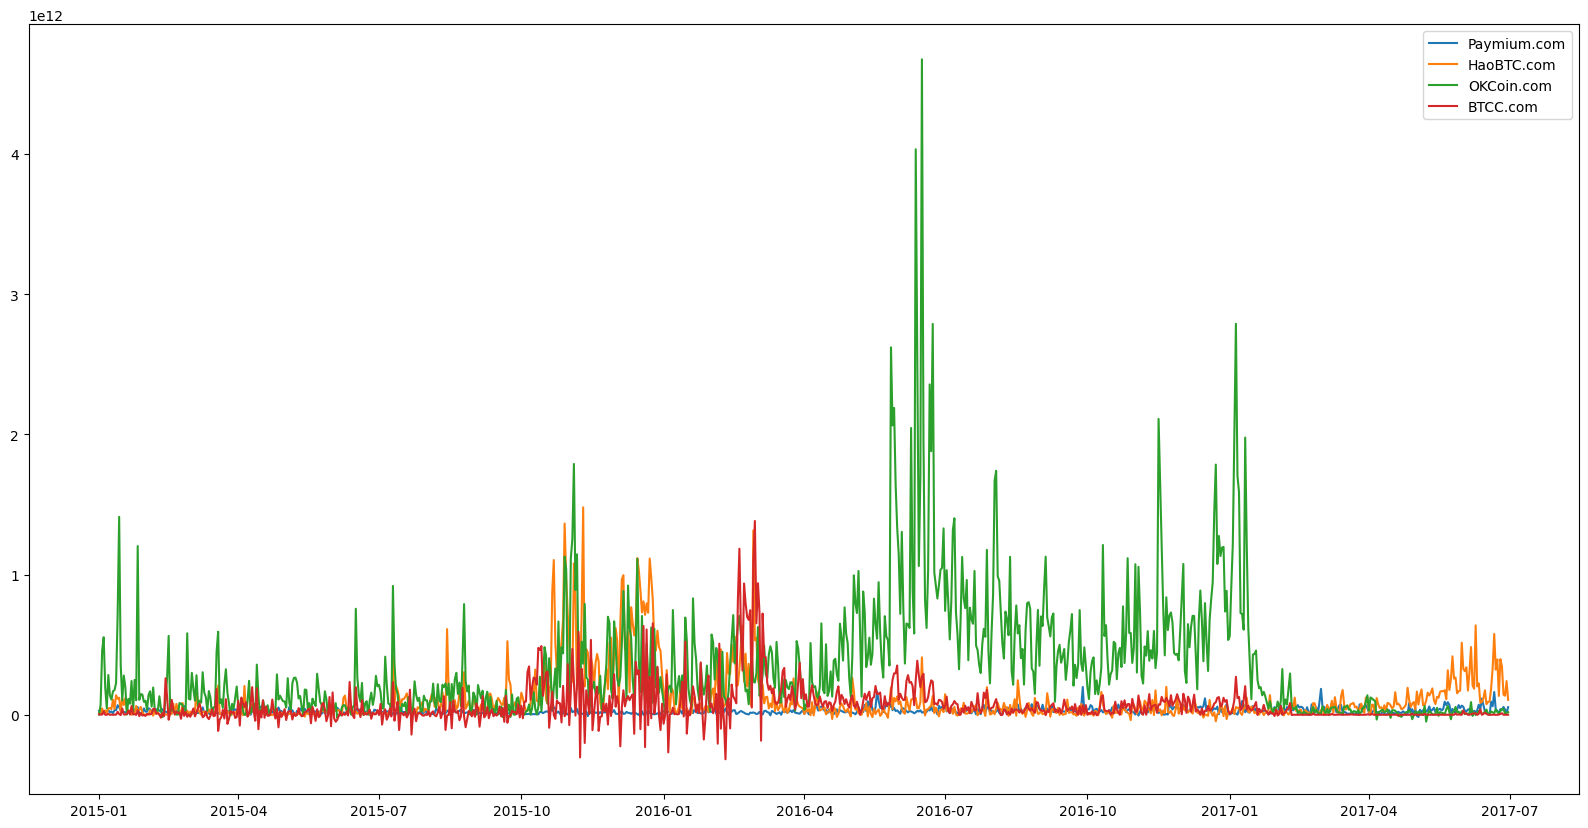

In [9]:
plt.figure(figsize=(20,10))
look = ['balance']
plt.plot(actor_df.loc['Paymium.com'].index, actor_df.loc['Paymium.com'][look], label='Paymium.com')
plt.plot(actor_df.loc['HaoBTC.com'].index, actor_df.loc['HaoBTC.com'][look], label='HaoBTC.com')
plt.plot(actor_df.loc['OKCoin.com'].index, actor_df.loc['OKCoin.com'][look], label='OKCoin.com')
plt.plot(actor_df.loc['BTCC.com'].index, actor_df.loc['BTCC.com'][look], label='BTCC.com')
#plt.plot(actor_df.loc['Poloniex.com'].index, actor_df.loc['Poloniex.com'][look], label='Poloniex.com')
plt.legend()
plt.show()

In [10]:
# compute the profits wich is the cumsum of each actor balance
actor_df['profit'] = actor_df.groupby(level=0)['balance'].cumsum()

actor_df.loc['ePay.info_CoinJoinMess'].head()

,received,nb_received,sum_fee,mean_fee_for100,nb_transactions,sent,self_spent,self_spent_estimated,nb_spent,spent,balance,profit
date,,,,,,,,,,,,
2015-01-01,5.482961e+11,12818,38239914,0.524910,1148,2.470622e+12,1.794224e+12,1.898125e+12,20749,5.724979e+11,1.769984e+12,1.769984e+12
2015-01-02,1.259197e+12,19625,62774624,0.433979,2145,4.627579e+12,3.294133e+12,3.310133e+12,41870,1.317446e+12,3.235821e+12,5.005805e+12
2015-01-03,1.505475e+12,17609,65207667,0.702425,1696,4.967562e+12,3.536510e+12,3.536510e+12,24355,1.431051e+12,3.610868e+12,8.616673e+12
2015-01-04,1.764592e+12,16536,61792309,0.583889,1487,4.893706e+12,3.061963e+12,3.061963e+12,23306,1.831743e+12,2.994749e+12,1.161142e+13
2015-01-05,1.374703e+12,29140,93421193,0.330920,2440,4.604852e+12,3.214107e+12,3.214107e+12,41958,1.390745e+12,3.197972e+12,1.480939e+13


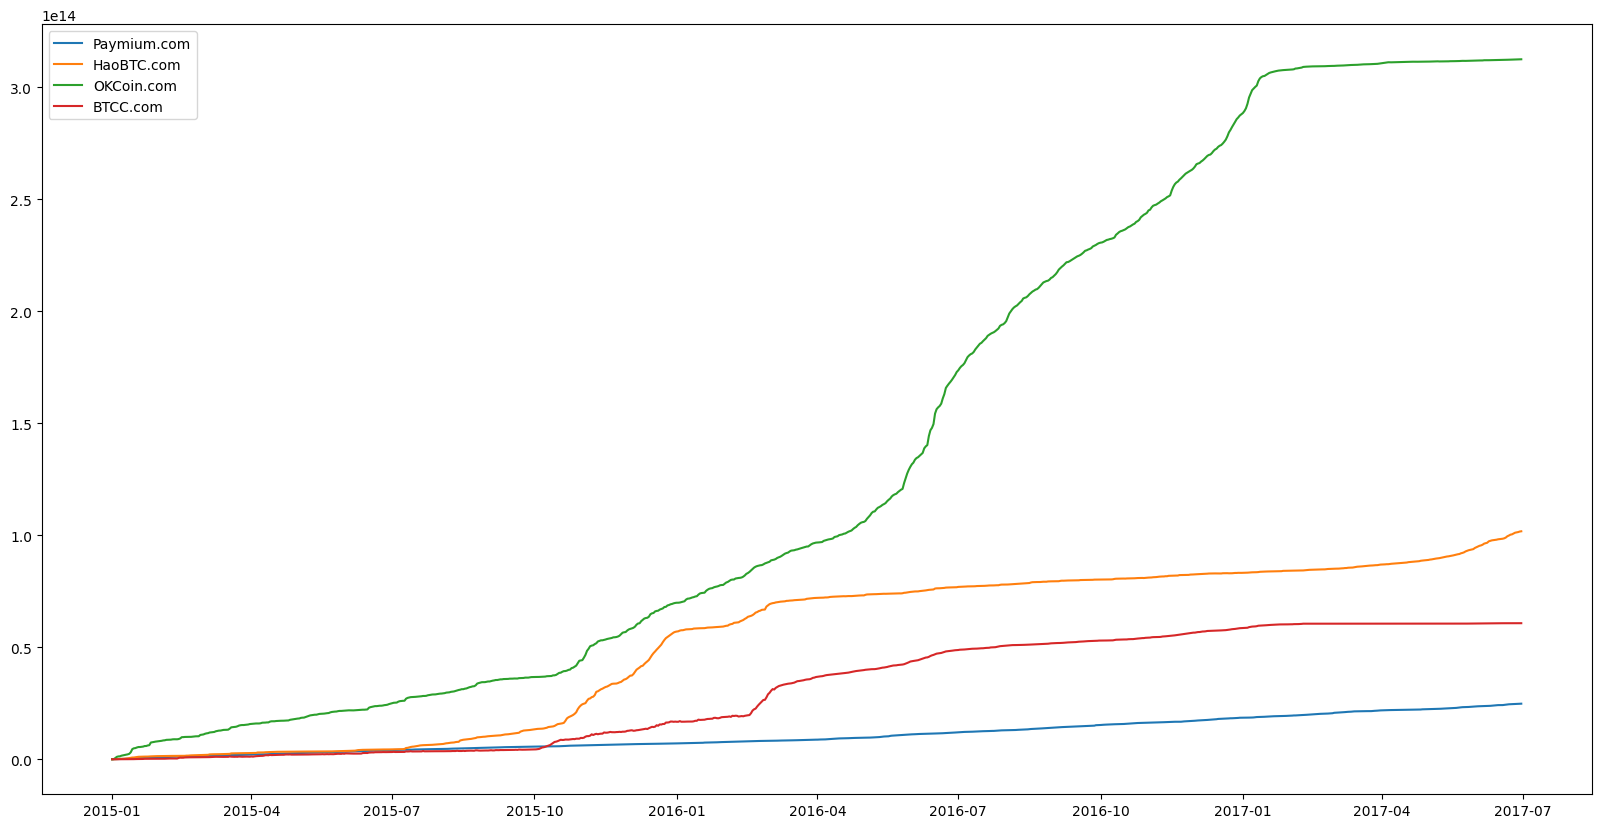

In [11]:
plt.figure(figsize=(20,10))
look = ['profit']
plt.plot(actor_df.loc['Paymium.com'].index, actor_df.loc['Paymium.com'][look], label='Paymium.com')
plt.plot(actor_df.loc['HaoBTC.com'].index, actor_df.loc['HaoBTC.com'][look], label='HaoBTC.com')
plt.plot(actor_df.loc['OKCoin.com'].index, actor_df.loc['OKCoin.com'][look], label='OKCoin.com')
plt.plot(actor_df.loc['BTCC.com'].index, actor_df.loc['BTCC.com'][look], label='BTCC.com')
#plt.plot(actor_df.loc['Poloniex.com'].index, actor_df.loc['Poloniex.com'][look], label='Poloniex.com')
plt.legend()
plt.show()

In [12]:
# using the profit column and the external_df dataframe, we can compute the profit of the exchanges in USD
# we need to convert the profit in BTC to USD

# first we need to create a small dataframes with only the date, the actor and the profit
actor_profits_df = actor_df[['profit']]

# we need to compute the profit in USD using the external_df dataframe
# we need to merge the two dataframes on the date column
actor_profits_df = actor_profits_df.merge(external_df[['PriceUSD']], left_index=True, right_index=True)
actor_profits_df.head()


profit    PriceUSD
identity date                                
0        2015-01-02  1.807196e+08  315.942732
         2015-01-03  2.041957e+11  285.647310
         2015-01-04  4.047780e+11  263.334575
         2015-01-05  4.043282e+11  275.003852
         2015-01-06  7.076734e+11  287.549521

In [13]:
# we can now compute the profit in USD
actor_profits_df['profit_usd'] = actor_profits_df['profit'] / 1e9 * actor_profits_df['PriceUSD']
actor_profits_df.head()

profit    PriceUSD     profit_usd
identity date                                               
0        2015-01-02  1.807196e+08  315.942732      57.097035
         2015-01-03  2.041957e+11  285.647310   58327.956877
         2015-01-04  4.047780e+11  263.334575  106592.036495
         2015-01-05  4.043282e+11  275.003852  111191.814421
         2015-01-06  7.076734e+11  287.549521  203491.134947

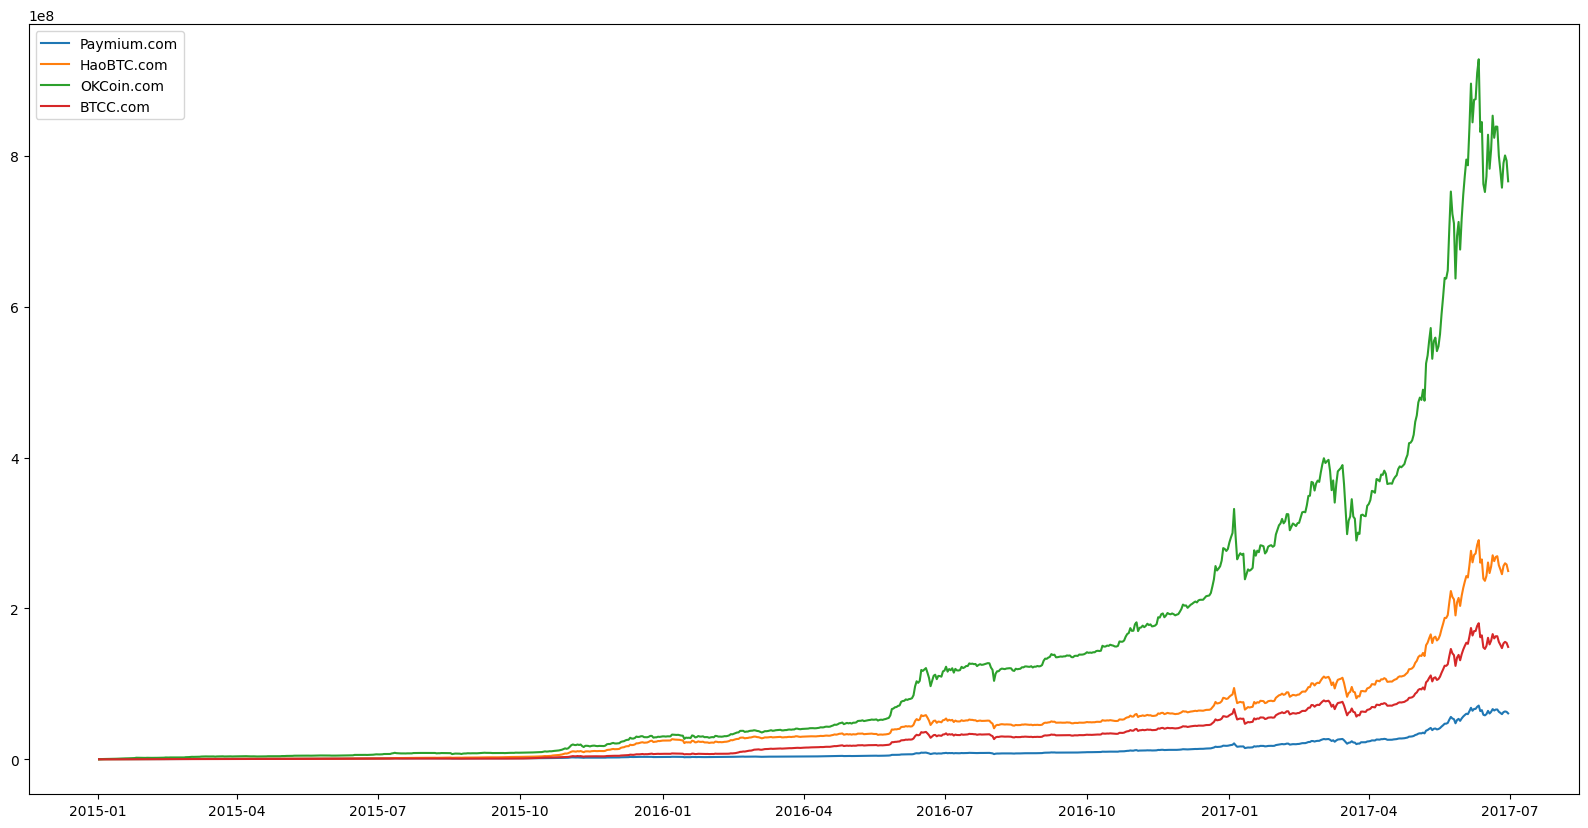

In [14]:
plt.figure(figsize=(20,10))
look = ['profit_usd']
plt.plot(actor_profits_df.loc['Paymium.com'].index, actor_profits_df.loc['Paymium.com'][look], label='Paymium.com')
plt.plot(actor_profits_df.loc['HaoBTC.com'].index, actor_profits_df.loc['HaoBTC.com'][look], label='HaoBTC.com')
plt.plot(actor_profits_df.loc['OKCoin.com'].index, actor_profits_df.loc['OKCoin.com'][look], label='OKCoin.com')
plt.plot(actor_profits_df.loc['BTCC.com'].index, actor_profits_df.loc['BTCC.com'][look], label='BTCC.com')
#.plot(actor_profits_df.loc['Poloniex.com'].index, actor_profits_df.loc['Poloniex.com'][look], label='Poloniex.com')
plt.legend()
plt.show()

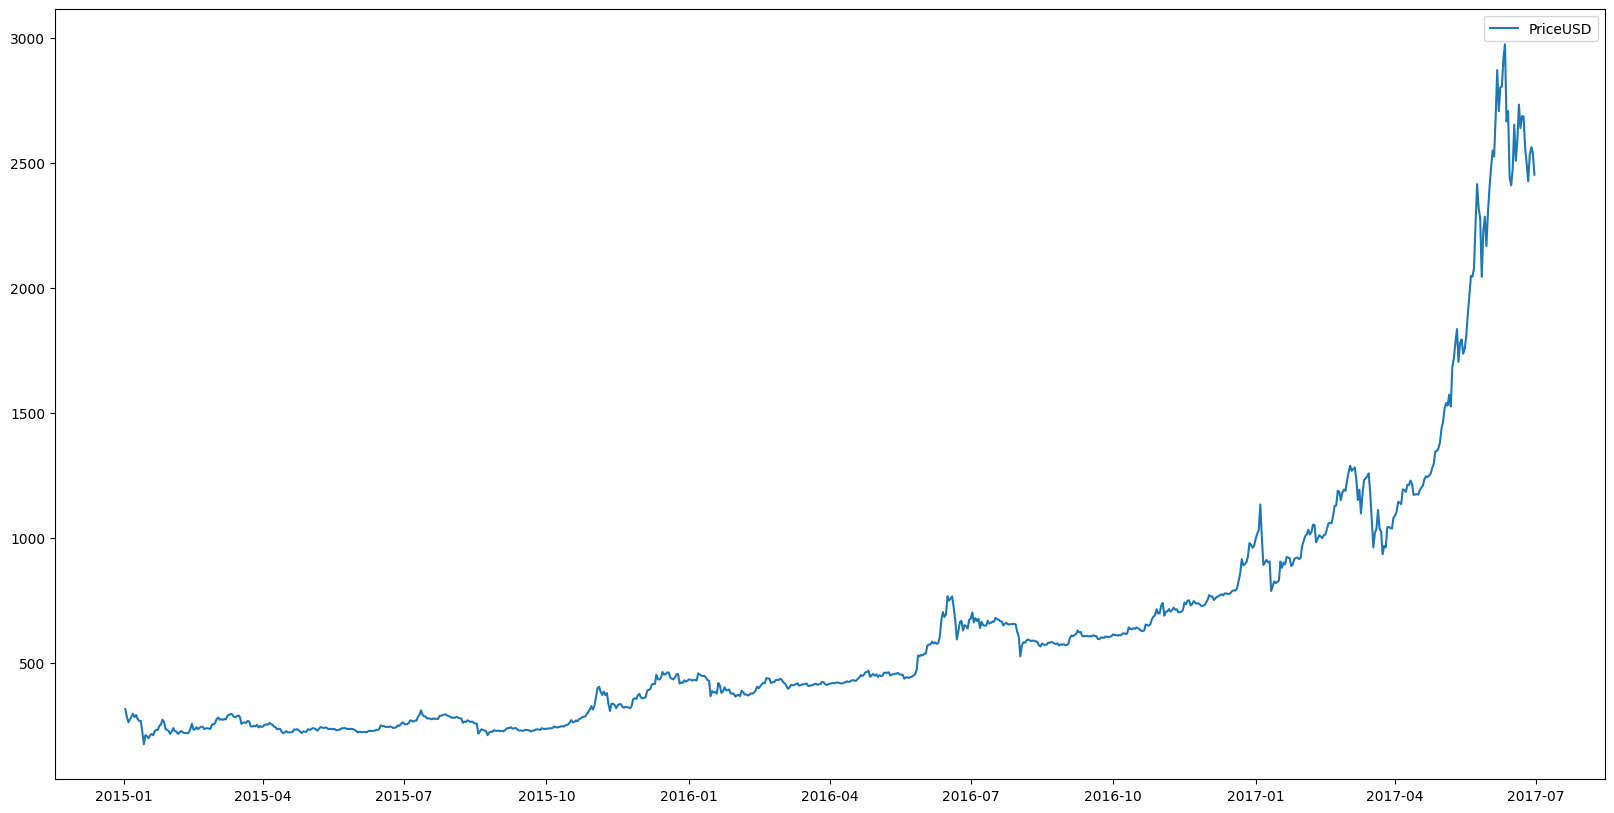

In [15]:
# plot bitcoint price
plt.figure(figsize=(20,10))
plt.plot(external_df.index, external_df['PriceUSD'], label='PriceUSD')
plt.legend()

In [16]:
# show the actor with the highest profit
actor_profits_df.loc[actor_profits_df['profit_usd'].idxmax()]


profit        4.379699e+15
PriceUSD      2.974215e+03
profit_usd    1.302617e+10
Name: (Poloniex.com, 2017-06-11 00:00:00), dtype: float64